# Data set from Kaggle 
https://www.kaggle.com/lava18/google-play-store-apps/downloads/google-play-store-apps.zip/6

# Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.
Content
Each app (row) has values for catergory, rating, size, and more.

In [1]:
import math
import pdb
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import t, sem
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data from the folder where I uploaded the csv file
data = pd.read_csv('/Users/AirMorena/Desktop/final_proj/csv/google_play_store/140619_google_playstore_apps_clean_newgrouped_newtarget.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9351 entries, 0 to 9350
Data columns (total 25 columns):
App                     9351 non-null object
Category                9351 non-null object
Rating                  9351 non-null float64
Reviews                 9351 non-null int64
Size                    9351 non-null float64
Installs                9351 non-null int64
Type                    9351 non-null object
Price                   9351 non-null float64
Content Rating          9351 non-null object
Genres                  9351 non-null object
Last Updated            9351 non-null object
Current Ver             9351 non-null object
Android Ver             9351 non-null float64
day                     9351 non-null int64
month                   9351 non-null int64
year                    9351 non-null int64
month_year              9351 non-null object
Current Ver_clean       9351 non-null float64
App_dup                 9351 non-null int64
Installs_group          9351 non-null o

In [5]:
data.shape

(9351, 25)

In [6]:
#data.head()

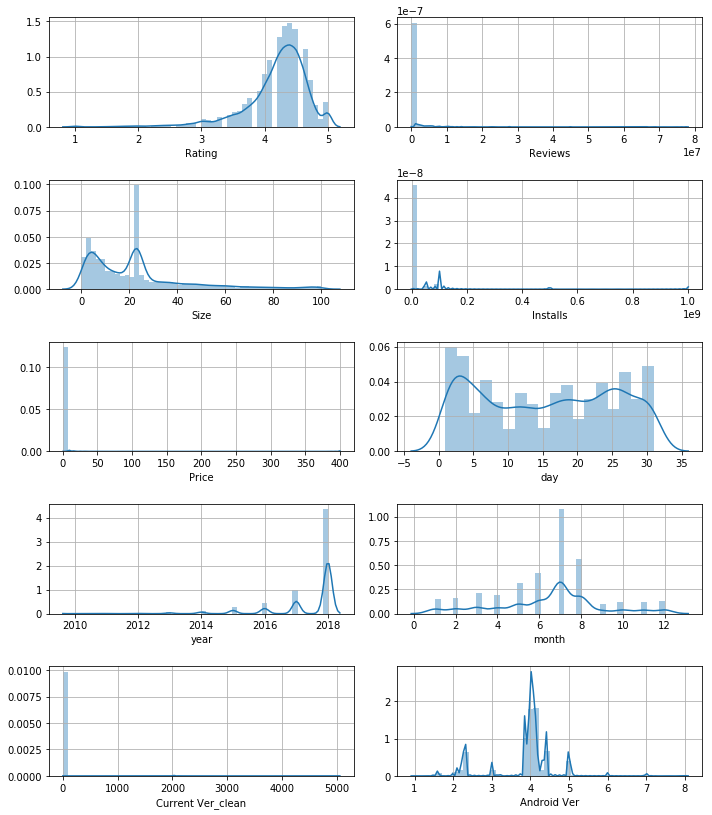

In [7]:
# Plot all numeric variable distributions and check if they are continuous or categorical
numerical = ['Rating','Reviews','Size','Installs','Price','day', 'year','month','Current Ver_clean','Android Ver']

# Visualize distributions in a grid
plt.figure(figsize=(10,20))
for i, feature in enumerate(numerical):
    plt.subplot(9, 2, i+1)
    sns.distplot(data[feature])
    plt.grid(True)
plt.tight_layout()
# time-related variables---> convert categorical
# reviews make groups ---> convert categorical
# installs make groups---> convert categorical
# size 2 groups more than 30 Megabytes?


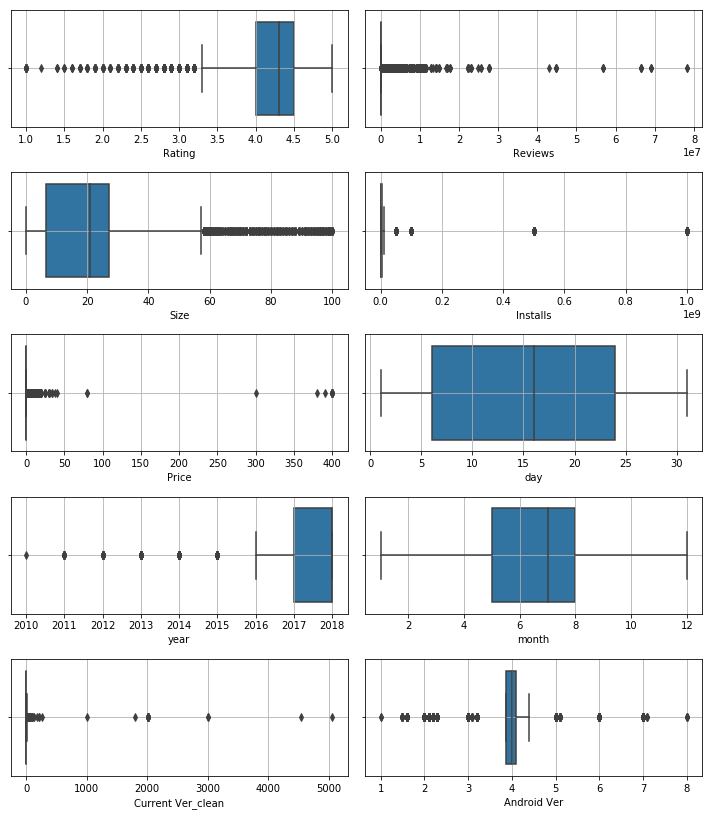

In [8]:
# Plot all numeric variable distributions and check if they are continuous or categorical
numerical = ['Rating','Reviews','Size','Installs','Price','day', 'year','month','Current Ver_clean','Android Ver']

# Visualize distributions in a grid
plt.figure(figsize=(10,20))
for i, feature in enumerate(numerical):
    plt.subplot(9, 2, i+1)
    sns.boxplot(data[feature])
    plt.grid(True)
plt.tight_layout()

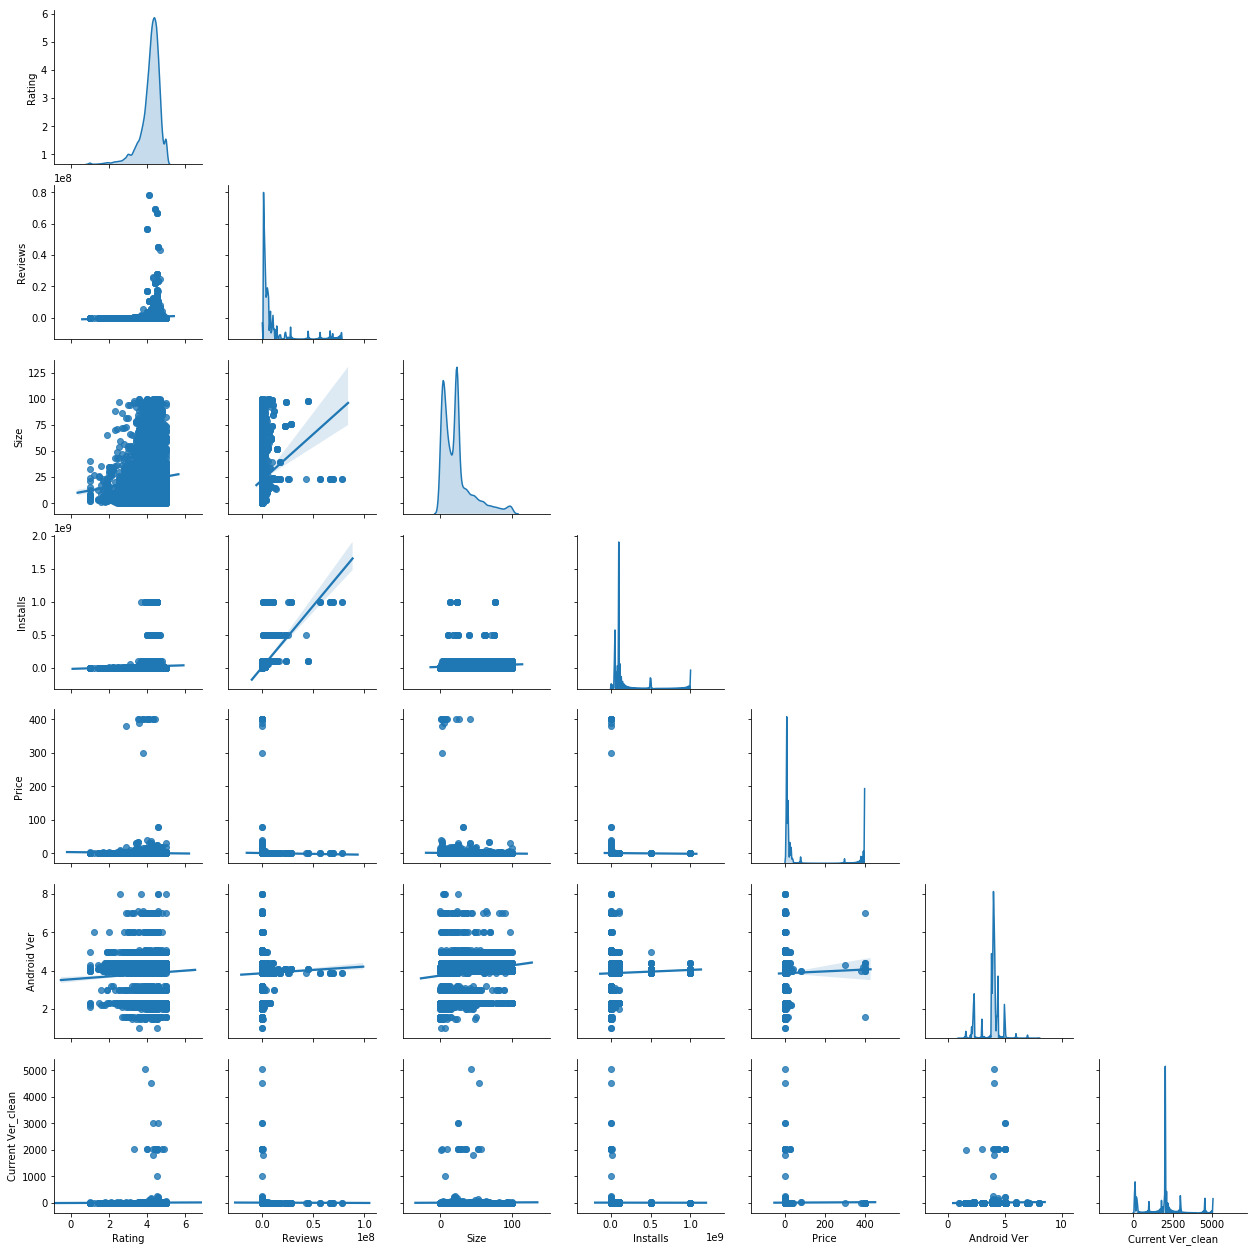

In [9]:
# check the data content of each feature and assign a type based on your understanding
numerical = ['Rating','Reviews','Size','Installs','Price','Android Ver','Current Ver_clean']

#nominal = ['type','App' 'category', 'Genres','Content Rating', 'month', 'year', 'day', 'month_year','Category']
# Build the correlation grid of cardinal variables with seaborn (tip: check pairplot kind reg)
plot=sns.pairplot(data[numerical], kind="reg", diag_kind='kde')

# Show only the lower triangle of the matrix
for i, j in zip(*np.triu_indices_from(plot.axes, 1)):
    plot.axes[i, j].set_visible(False)

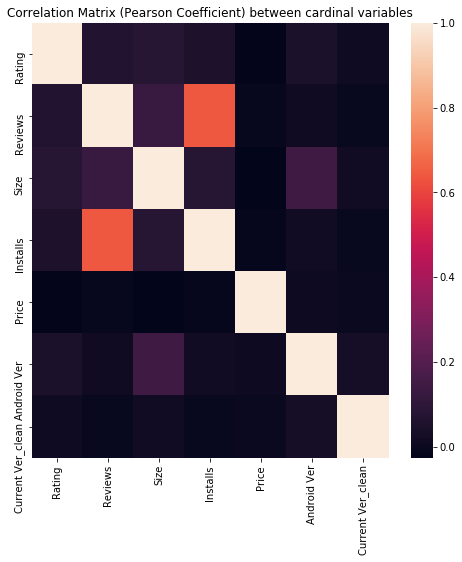

In [11]:
# Calculate the Pearson Coefficient and find most correlated pairs
# build the correlation matrix with the calculation of the pearson coefficient (tip: check pandas .corr() method)
correlation_matrix = data[numerical].corr(method='pearson')
# visualize correlation matrix in a heatmap
_=plt.figure(figsize=(8,8))
_=sns.heatmap(correlation_matrix)
_=plt.title('Correlation Matrix (Pearson Coefficient) between cardinal variables')

In [ ]:
# make groups for the identified features

In [ ]:
# reviews grouping

In [ ]:
#vizualisation distribution of number of reviews values
_=sns.boxplot(data['Reviews'])
plt.title("Number of Reviews by app")

In [ ]:
sorted_by_reviews = data.sort_values(by=['Reviews'], ascending=False)
#sorted_by_reviews.head()

In [ ]:
data['Reviews'].describe()

In [ ]:
# reviews: 3 groups, create 3 conditions: group1 1 review to 5900, group2 between 
low = (data['Reviews']>=1)& (data['Reviews']<1000)
medium = (data['Reviews']>=1000) & (data['Reviews']<8.162750e+04)
high =(data['Reviews']>8.162750e+04)

data.loc[data[low].index, 'nb_reviews_levels'] = 'low'
data.loc[data[medium].index, 'nb_reviews_levels'] = 'medium'
data.loc[data[high].index, 'nb_reviews_levels'] = 'high'

In [ ]:
data['nb_reviews_levels']

In [16]:
# size grouping: 2 groups : small <30 and big>=30
data['Size'].dtypes
small = (data['Size']<30.0)
big= (data['Size']>=30.0)

data.loc[data[small].index, 'Size_group'] = 'small'
data.loc[data[big].index, 'Size_group'] = 'big'

In [17]:
#data.head()

In [18]:
# Installs grouping

In [19]:
data['Installs'].describe().round(2)

count    9.351000e+03
mean     1.792599e+07
std      9.130859e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [20]:
#data.head()

In [21]:
data['Rating'].describe()

count    9351.000000
mean        4.192247
std         0.513537
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [22]:
# Ratings group in 2 groups: success_rating 4.3 is the median rating all caregories
high= (data['Rating']>=4.3)
low=(data['Rating']<4.3)

data.loc[data[high].index, 'success_rating'] = 'high'
data.loc[data[low].index, 'success_rating'] = 'low'

Text(0.5, 0, 'Rating')

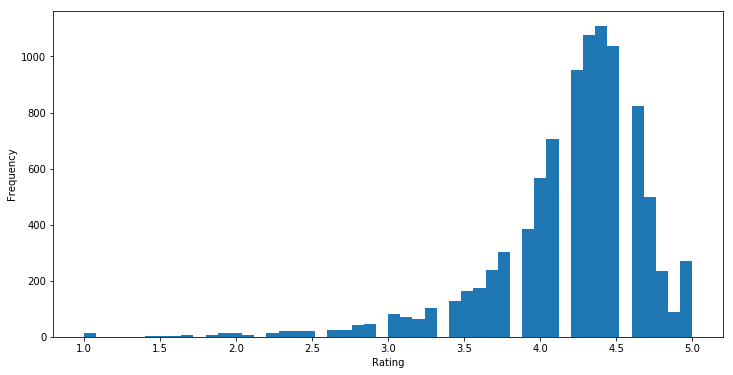

In [23]:
data.Rating.plot(kind = "hist", bins = 50, figsize = (12,6))
plt.xlabel("Rating")
#plt.title("Rating of Distribution")
# 50% of apps rating is quite good above 4.2

In [24]:
#condition DATING
data_dating=data[data['Category']=='DATING']

Text(0.5, 1.0, 'Rating of Distribution of DATING Apps')

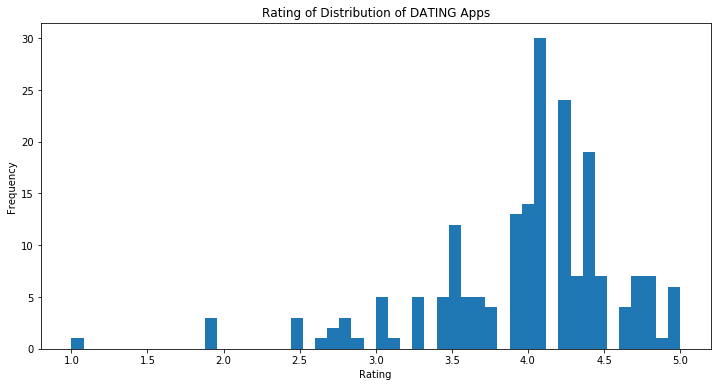

In [25]:
#condition DATINGrating distribution
data_dating.Rating.plot(kind = "hist", bins = 50, figsize = (12,6))
plt.xlabel("Rating")
plt.title("Rating of Distribution of DATING Apps")


In [26]:
data[['Rating', 'Category']].groupby(['Category']).median().sort_values(by='Rating')

,Rating
Category,
DATING,4.1
TOOLS,4.2
ENTERTAINMENT,4.2
NEWS_AND_MAGAZINES,4.2
MAPS_AND_NAVIGATION,4.2
LIFESTYLE,4.2
LIBRARIES_AND_DEMO,4.2
VIDEO_PLAYERS,4.2
HOUSE_AND_HOME,4.3


In [27]:
# reviews feature

In [28]:
data['Reviews'].describe()

count    9.351000e+03
mean     5.148718e+05
std      3.146496e+06
min      1.000000e+00
25%      1.880000e+02
50%      5.969000e+03
75%      8.187600e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [29]:
### time-related features

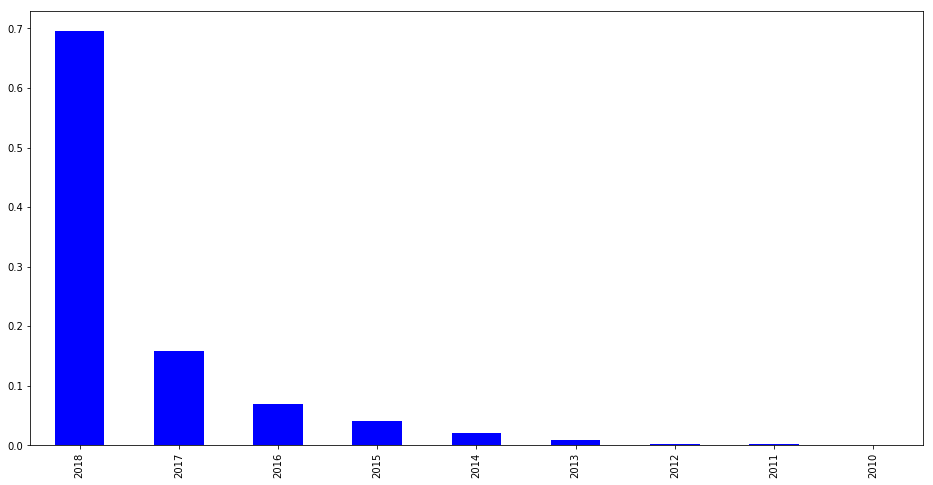

In [93]:
# Data collection from December 2013 to August 2018: App counts
# Visualize frequencies of each value of 'month_year' NORMALIZED
plt.figure(figsize=(16,8))
content_year = data['year']
relative_freqs_type = content_year.value_counts(normalize=True)
_=relative_freqs_type.plot(kind='bar', color='b')
#_=plt.title('Relative Frequency Distribution by year')
# over 65% of the data comes from 2018

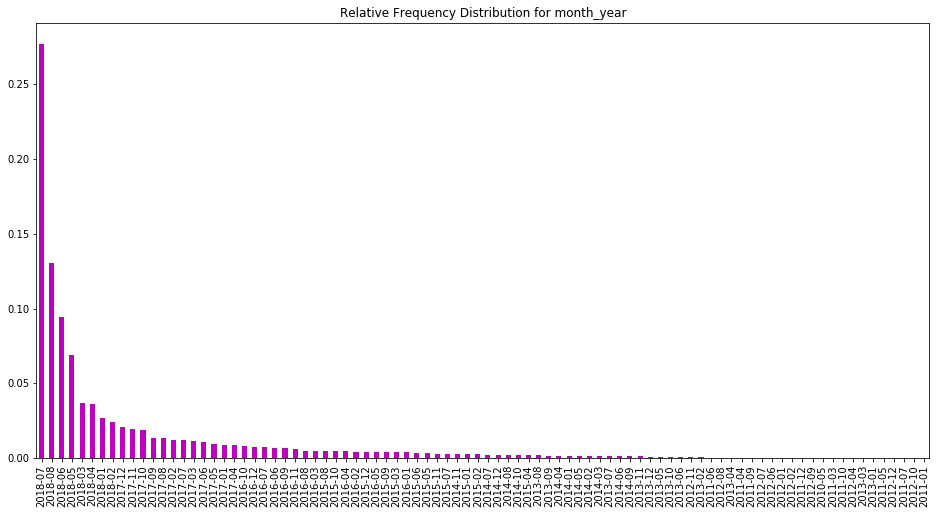

In [31]:
# Data and time
# Feature month_year
# Visualize frequencies of each value of 'month_year' NORMALIZED
plt.figure(figsize=(16,8))
content_month_year = data['month_year']
relative_freqs_type = content_month_year.value_counts(normalize=True)
_=relative_freqs_type.plot(kind='bar', color='m')
_=plt.title('Relative Frequency Distribution for month_year')

In [32]:
# Categories

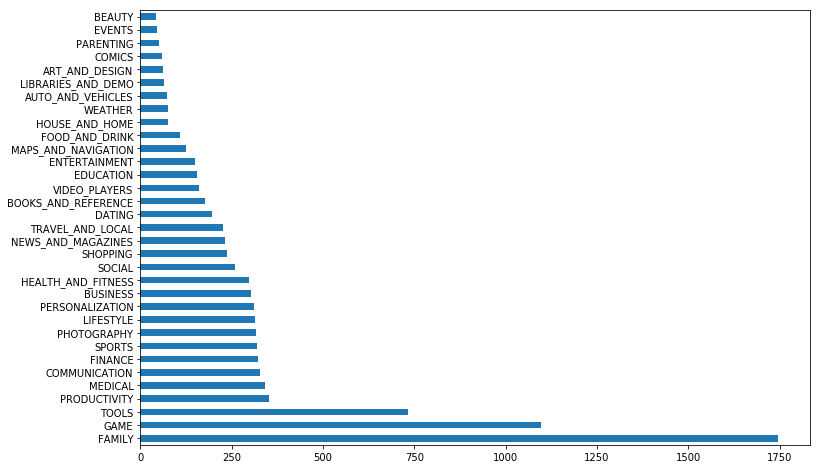

In [33]:
data.Category.value_counts().plot(kind='barh',figsize= (12,8))

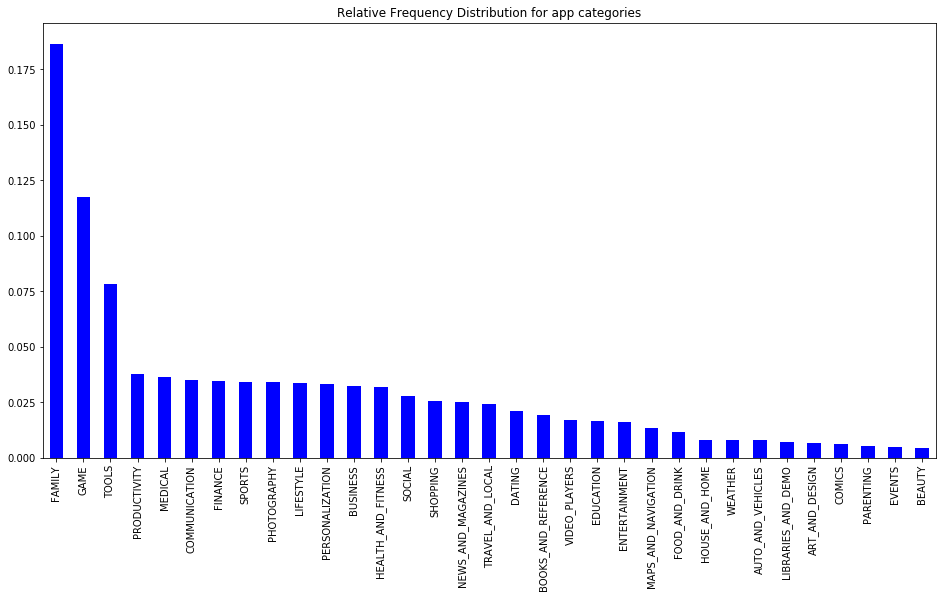

In [34]:
# What are the most prevalent categories?
# Visualize frequencies of each category when we normalise (see normalise=True)
Category = data['Category']
plt.figure(figsize=(16,8))
relative_freqs_type = Category.value_counts(normalize=True)
_=relative_freqs_type.plot(kind='bar', color='blue')
_=plt.title('Relative Frequency Distribution for app categories')

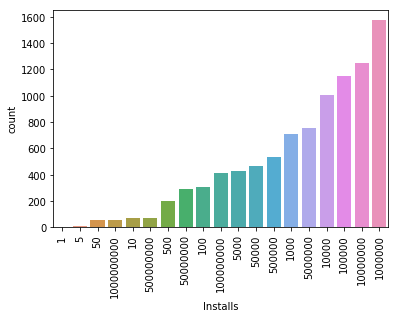

In [35]:
order = data.groupby('Installs').count().sort_values(by='App',ascending=True).index.values

plt.xticks(rotation=90)

sns.countplot(x='Installs', data=data, order=order)

In [36]:
data['Installs'].describe()

count    9.351000e+03
mean     1.792599e+07
std      9.130859e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

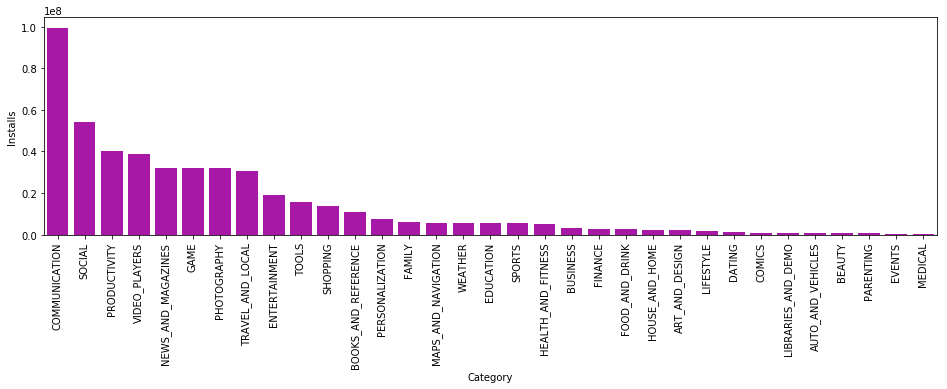

In [37]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.barplot(x="Category", y="Installs",color='m', data=data.groupby('Category').mean().sort_values(by="Installs", ascending=False).reset_index())

In [38]:
#sorted_by_installs = data.sort_values(by=['Installs'], ascending=False)
#sorted_by_installs.head()

In [ ]:
# scatter 

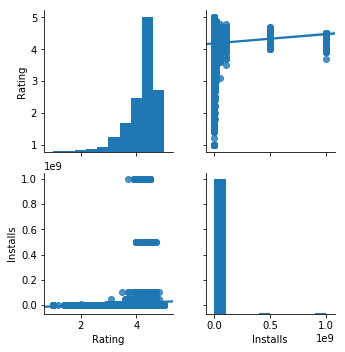

In [95]:
# if we want to use the 2: create a list with both features
sns.pairplot(data[['Rating','Installs']], kind ="reg")
plt.show()

Text(0.5, 1.0, 'average number of Installations in each Category')

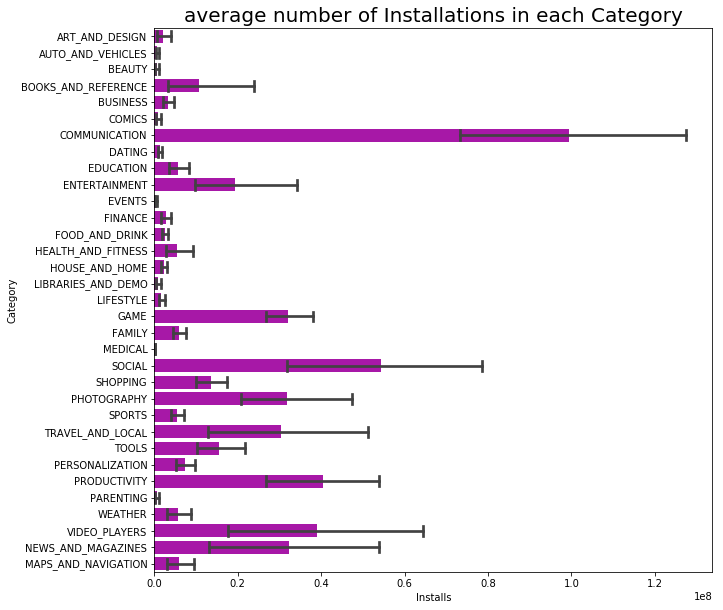

In [39]:
#### What are the categories with highest average number of installs?
#barplot Installations and category
plt.figure(figsize=(10,10))
g = sns.barplot(x="Installs", y="Category", data=data, capsize=.6, color='m')
plt.title('average number of Installations in each Category',size = 20)
# the categories with the highest number of installs are:comm, social, productivity

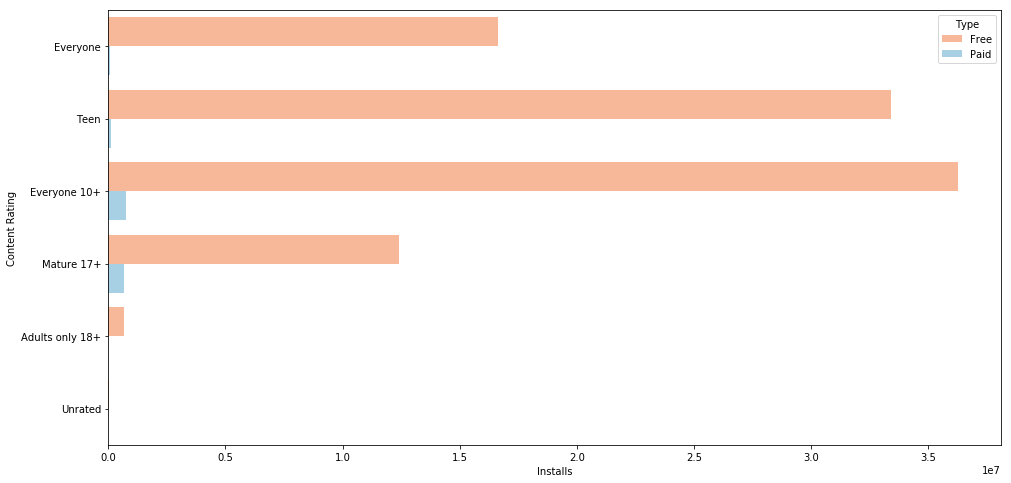

In [40]:
### who downloads the most?
#installs by Content rating
plt.figure(figsize=(16,8))
a = sns.barplot(y = data["Content Rating"], x = data["Installs"] ,
                saturation=1 , 
                hue = data["Type"] ,
                palette = "RdBu",
                data = data, ci=None)

Text(0.5, 1.0, 'price by app')

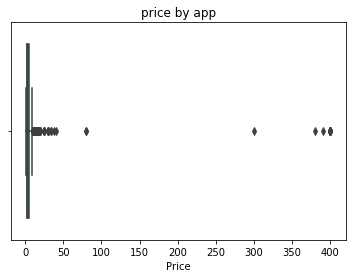

In [41]:
# what is the average price among paid Apps?
condition_app_paid=(data['Type']=='Paid')
#condition_app_paid
condition_app_price=(data['Price']>0)
#condition_app_price
data[condition_app_paid & condition_app_price]
data_price=data[condition_app_paid & condition_app_price]

_=sns.boxplot(data_price['Price'])
plt.title("price by app")


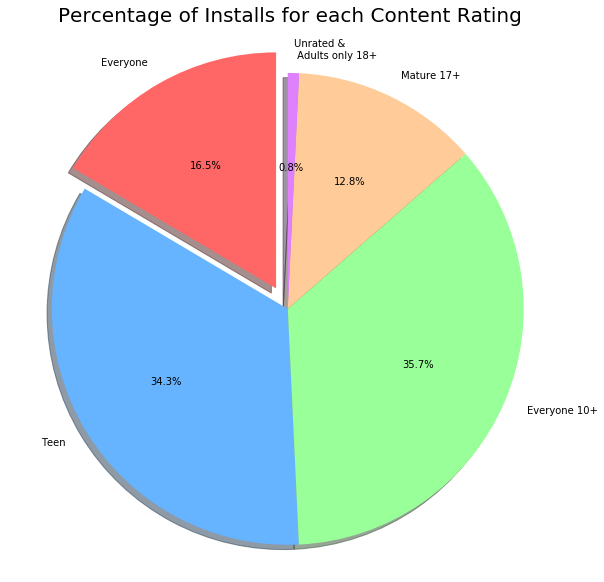

In [42]:
##pie plot
labels=data['Content Rating'].unique()
explode = (0.1, 0, 0, 0, 0)
size=list()
for content in labels:
    size.append(data[data['Content Rating']==content]['Installs'].mean())

##merging Unrated & Adults 
labels[4] = 'Unrated &\n Adults only 18+'
labels = np.delete(labels,5)
size[4]=size[4]+size[5]
size.pop()

plt.figure(figsize=(10,10))
colors = ['#ff6666','#66b3ff','#99ff99','#ffcc99', '#df80ff']
plt.pie(size, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of Installs for each Content Rating',size = 20)
plt.show()


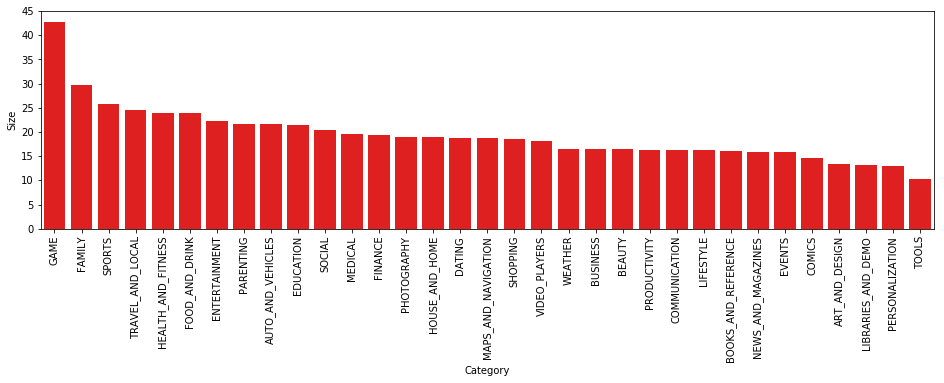

In [43]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.barplot(x="Category", y="Size",color='r', data=data.groupby('Category').mean().sort_values(by="Size", ascending=False).reset_index())

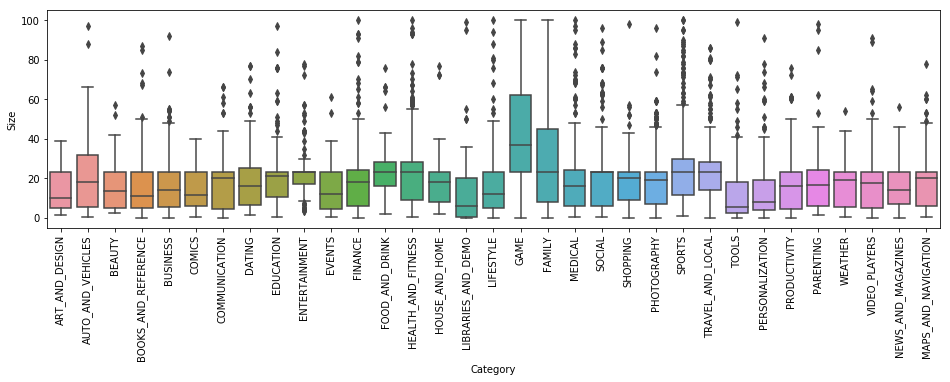

In [44]:
data['Size'] = data['Size'].round(2)
plt.figure(figsize=(16, 4))
plt.xticks(rotation=90)

sns.boxplot(y='Size', x='Category', data=data)



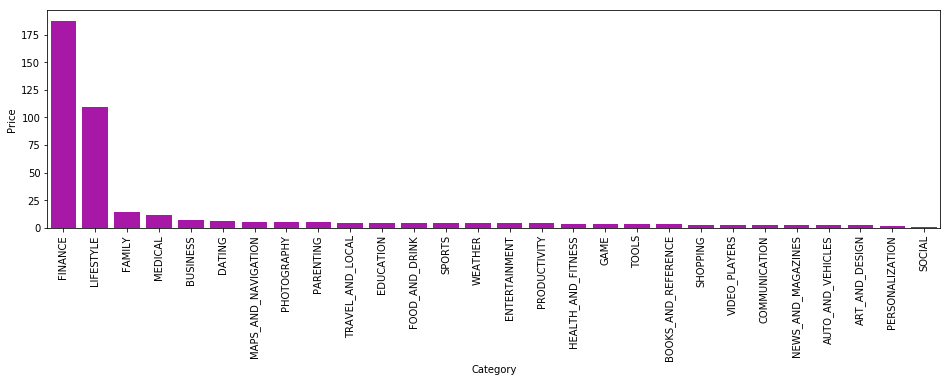

In [45]:
#Mean price
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.barplot(x="Category", y="Price",color='m', data=data_price.groupby('Category').mean().sort_values(by="Price", ascending=False).reset_index())

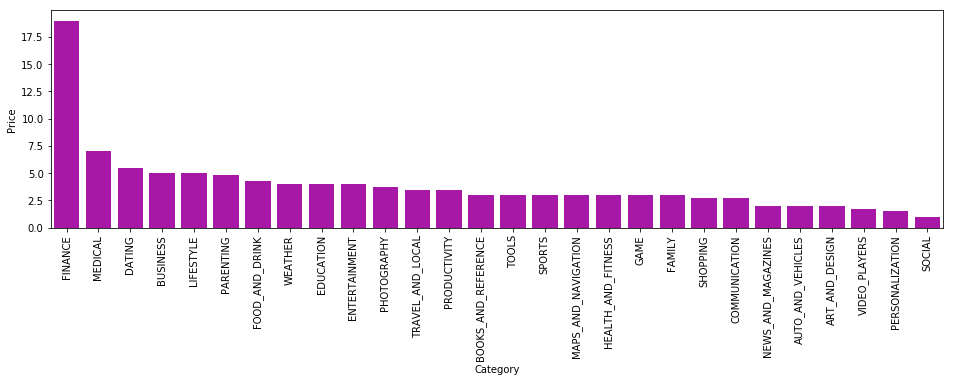

In [46]:
#Median price
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.barplot(x="Category", y="Price",color='m', data=data_price.groupby('Category').median().sort_values(by="Price", ascending=False).reset_index())

In [47]:
# what the catgories of App with the highest sizes
# barplot size and category
#plt.figure(figsize=(10,10))
#g = sns.barplot(x="Size", y="Category", data=data, capsize=.6, color='b')
#plt.title('Category and size',size = 20)
# Gaming Apps have the highest average size 

In [48]:
## Price

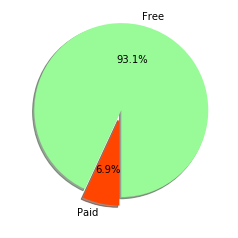

In [49]:
# what is the percentage of paid Apps?

labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)

colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
#plt.title('Percent of Apps free/paid in Google Play store',size = 20)
plt.show()

Text(0.5, 1.0, 'price by app')

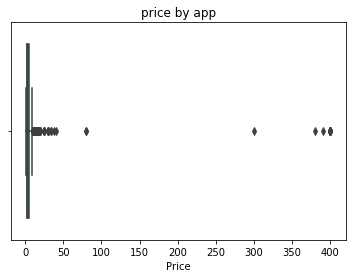

In [50]:
# what is the average price among paid Apps?
condition_app_paid=(data['Type']=='Paid')
#condition_app_paid
condition_app_price=(data['Price']>0)
#condition_app_price
data[condition_app_paid & condition_app_price]
data_price=data[condition_app_paid & condition_app_price]

_=sns.boxplot(data_price['Price'])
plt.title("price by app")

In [51]:
data_price['Price'].describe()
# the median price among paid apps is 2.99 dollars, mean is 13.9 dollars
# the min 0.99 
# the max 400

count    645.000000
mean      13.949721
std       58.791144
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

In [52]:
# What is the median price by category of App?
df1=data_price[['Category', 'Price']].groupby('Category').median()
df1.sort_values(by=['Price'], ascending=False).round(2)

# the highest median price is 18.99 for finance category, medical, dating, business, lifestyle

,Price
Category,
FINANCE,18.99
MEDICAL,6.99
DATING,5.49
BUSINESS,4.99
LIFESTYLE,4.99
PARENTING,4.79
FOOD_AND_DRINK,4.24
WEATHER,3.99
EDUCATION,3.99


In [53]:
#data_price[['App','Category','Price']].sort_values(by=['Price'], ascending=False) 

In [54]:
#data_price[['App','Category','Rating','Installs']].sort_values(by=['Installs', 'Rating','Category'], ascending=False) 

In [55]:
#data_price[['App', 'Price']].groupby('App').median().sort_values(by=['Price'], ascending=True).round(2) 

In [56]:
# What is the mean price by category of App?
df2=data_price[['Category', 'Price']].groupby('Category').mean()
df2=df2.sort_values(by=['Price'], ascending=False).round(2) 
# the highest mean price is 18.99 for finance category, medical, dating, business, lifestyle

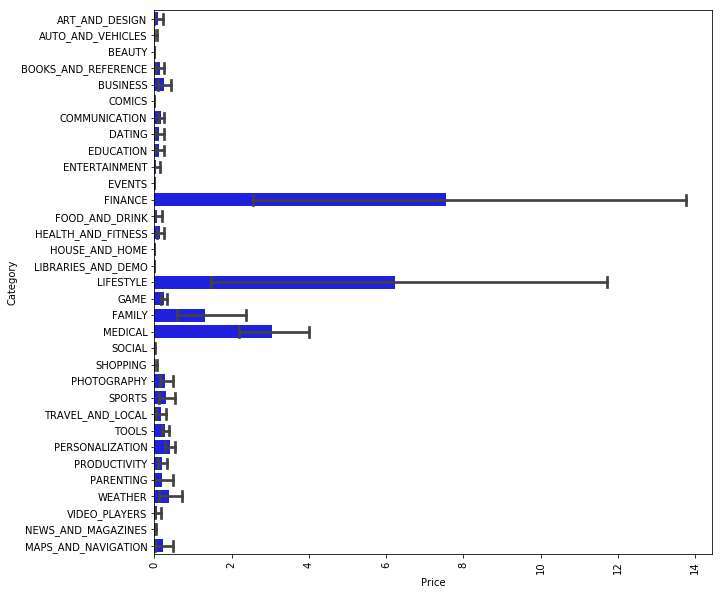

In [57]:
# what the catgories of App with the highest price
# barplot price and category
plt.figure(figsize=(10,10))
g = sns.barplot(x="Price", y="Category", data=data,capsize=.6, color='b')
# rotate tick labels to vertical

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

#plt.title('Category and Price',size = 20)
# Gaming Apps have the highest average size 
# do this one in Tableau

In [58]:
#_=sns.distplot(df1['Price'])
#plt.title("Apps median price")
#plt.grid(True)
#plt.tight_layout()

In [59]:
# median price


In [60]:
# mean price
#df2.describe().round(2)

In [61]:
#_=sns.distplot(df2['Price'])
#plt.title("Apps average price")
#plt.grid(True)
#plt.tight_layout()

In [62]:
#data.sort_values(by='App').head()

In [63]:
len(data)-len(data['App'].unique())

1170

In [64]:
# duplicates Apps: Apps with no duplicates
#data[data.duplicated(['App'])]

In [65]:
# duplicates Apps: Apps WITH duplicates
data2=data.groupby(['App']).count()

In [66]:
data2.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Current Ver_clean,App_dup,Installs_group,reviews_levels,Size_group,st_Rating,st_Current Ver_clean,st_Android Ver,nb_reviews_levels,success_rating
App,,,,,,,,,,,,,,,,,,,,,
+Download 4 Instagram Twitter,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
- Free Comics - Comic Apps,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
.R,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
/u/app,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
058.ba,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [67]:
# extract columns name that have at least one duplicates so category is at least 2
data2[data2['Category']>1]
# Select all the rows which satisfies the criteria 
# convert the collection of index labels to list. 
duplicates_appnames = data2[data2['Category']>1].index.tolist() 

# Print all the labels 
#print(Index_label)

In [68]:
# isin (check instacart notebook)
# for unique App App_dup==0
data['App_dup']=0
# when apply isin give 1  to Apps that have duplicates
#data[data['App'].isin(duplicates_appnames)].sort_values(by='App')

In [69]:
# condition App duplicates yes
condition3=data['App'].isin(duplicates_appnames)
#condition3

In [70]:
# for Apps that have a least 2 rows App_dup==1
data.loc[data[condition3].index, 'App_dup']=1

In [71]:
#data.sort_values(by=['App'], ascending=True)
# it does not count the 20 minutes (CH) as duplicates----> to double check
# for 2017 emra there are 2  real duplicates

In [72]:
data[data['App_dup']==1].sort_values(by=['App'], ascending=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Current Ver_clean,App_dup,Installs_group,reviews_levels,Size_group,st_Rating,st_Current Ver_clean,st_Android Ver,nb_reviews_levels,success_rating
1327,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.80,500000,Free,0.00,Everyone 10+,Health & Fitness,...,1.900000,1,high,medium,small,-0.374378,-6.600173e-02,-2.002897,medium,low
1341,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.80,500000,Free,0.00,Everyone 10+,Health & Fitness,...,1.900000,1,high,medium,small,-0.374378,-6.600173e-02,-2.002897,medium,low
2401,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.00,1000000,Free,0.00,Everyone,Medical,...,7.400000,1,high,medium,small,0.988789,-1.922795e-02,1.443915,medium,high
2234,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.00,1000000,Free,0.00,Everyone,Medical,...,7.400000,1,high,medium,small,0.988789,-1.922795e-02,1.443915,medium,high
2171,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.80,1000,Paid,16.99,Everyone,Medical,...,1.000000,1,low,low,small,0.404575,-7.365562e-02,0.167318,low,high
2296,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.80,1000,Paid,16.99,Everyone,Medical,...,1.000000,1,low,low,small,0.404575,-7.365562e-02,0.167318,low,high
1271,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15.00,100000,Free,0.00,Everyone,Health & Fitness,...,3.000000,1,low,medium,small,0.404575,-5.664697e-02,0.294978,medium,high
1368,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15.00,100000,Free,0.00,Everyone,Health & Fitness,...,3.000000,1,low,medium,small,0.404575,-5.664697e-02,0.294978,medium,high
5096,365Scores - Live Scores,SPORTS,4.6,666246,25.00,10000000,Free,0.00,Everyone,Sports,...,5.500000,1,high,high,small,0.794051,-3.538616e-02,0.294978,high,high
2941,365Scores - Live Scores,SPORTS,4.6,666521,25.00,10000000,Free,0.00,Everyone,Sports,...,5.500000,1,high,high,small,0.794051,-3.538616e-02,0.294978,high,high


In [73]:
data[data['App_dup']==1].count()

App                     1959
Category                1959
Rating                  1959
Reviews                 1959
Size                    1959
Installs                1959
Type                    1959
Price                   1959
Content Rating          1959
Genres                  1959
Last Updated            1959
Current Ver             1959
Android Ver             1959
day                     1959
month                   1959
year                    1959
month_year              1959
Current Ver_clean       1959
App_dup                 1959
Installs_group          1959
reviews_levels          1959
Size_group              1959
st_Rating               1959
st_Current Ver_clean    1959
st_Android Ver          1959
nb_reviews_levels       1959
success_rating          1959
dtype: int64

In [74]:
#1959 records have more than one time the same App name

In [75]:
# make the conditions for success rating> or =4.3 and installs>=500 000

# generate the success var based on number of installs and rating
data['Successful_App']=0
condition4=(data['Rating']>=4.3)
condition5=(data['Installs']>500000)
data.loc[data[condition4 & condition5].index, 'Successful_App']=1

In [76]:
#data[data['Successful_App']==1].sort_values(by='Category')

In [77]:
data[data['Successful_App']==1].count()
# 2711/9351=> 29% of Apps

App                     2711
Category                2711
Rating                  2711
Reviews                 2711
Size                    2711
Installs                2711
Type                    2711
Price                   2711
Content Rating          2711
Genres                  2711
Last Updated            2711
Current Ver             2711
Android Ver             2711
day                     2711
month                   2711
year                    2711
month_year              2711
Current Ver_clean       2711
App_dup                 2711
Installs_group          2711
reviews_levels          2711
Size_group              2711
st_Rating               2711
st_Current Ver_clean    2711
st_Android Ver          2711
nb_reviews_levels       2711
success_rating          2711
Successful_App          2711
dtype: int64

0    71.008448
1    28.991552
Name: Successful_App, dtype: float64


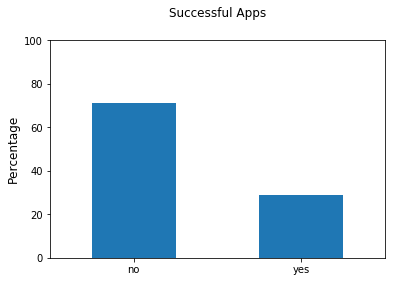

In [78]:
# Frequency table

freq_table = data['Successful_App'].value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Successful Apps',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['no', 'yes'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()


In [79]:
#

In [80]:
# Visualize the contingency table between size and success_inst_rat 
table= pd.crosstab(data['Size_group'], data['Successful_App'],normalize='index')
print(table)

Successful_App         0         1
Size_group                        
big             0.616171  0.383829
small           0.738158  0.261842


In [81]:
chi, pvalue, dof, expctd = chi2_contingency(pd.crosstab(data['Size_group'], data['Successful_App']))
print("Chi-square between {} and {} is {} with a p-value of {:2f}".format('Size_group','Successful_App', chi, pvalue))

Chi-square between Size_group and Successful_App is 119.16561966479642 with a p-value of 0.000000


In [82]:
table1= pd.crosstab(data['Type'], data['Successful_App'],normalize='index')
print(table1)

Successful_App         0         1
Type                              
Free            0.691477  0.308523
Paid            0.961240  0.038760


In [83]:
table2= pd.crosstab(data['Category'], data['Successful_App'],normalize='index').round(2)
print(table2)

Successful_App          0     1
Category                       
ART_AND_DESIGN       0.84  0.16
AUTO_AND_VEHICLES    0.82  0.18
BEAUTY               0.88  0.12
BOOKS_AND_REFERENCE  0.76  0.24
BUSINESS             0.81  0.19
COMICS               0.83  0.17
COMMUNICATION        0.62  0.38
DATING               0.91  0.09
EDUCATION            0.44  0.56
ENTERTAINMENT        0.68  0.32
EVENTS               0.93  0.07
FAMILY               0.79  0.21
FINANCE              0.80  0.20
FOOD_AND_DRINK       0.65  0.35
GAME                 0.51  0.49
HEALTH_AND_FITNESS   0.56  0.44
HOUSE_AND_HOME       0.64  0.36
LIBRARIES_AND_DEMO   0.97  0.03
LIFESTYLE            0.85  0.15
MAPS_AND_NAVIGATION  0.75  0.25
MEDICAL              0.94  0.06
NEWS_AND_MAGAZINES   0.77  0.23
PARENTING            0.86  0.14
PERSONALIZATION      0.73  0.27
PHOTOGRAPHY          0.52  0.48
PRODUCTIVITY         0.62  0.38
SHOPPING             0.56  0.44
SOCIAL               0.66  0.34
SPORTS               0.73  0.27
TOOLS   

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=table2,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [84]:
chi, pvalue, dof, expctd = chi2_contingency(pd.crosstab(data['Category'], data['Successful_App']))
print("Chi-square between {} and {} is {} with a p-value of {:2f}".format('Category','Successful_App', chi, pvalue))

Chi-square between Category and Successful_App is 746.8930955401506 with a p-value of 0.000000


In [85]:
table3= pd.crosstab(data['Genres'], data['Successful_App'],normalize='index').round(2)
print(table3)

Successful_App                            0     1
Genres                                           
Action                                 0.50  0.50
Action;Action & Adventure              0.35  0.65
Adventure                              0.79  0.21
Adventure;Action & Adventure           0.23  0.77
Adventure;Brain Games                  1.00  0.00
Adventure;Education                    1.00  0.00
Arcade                                 0.48  0.52
Arcade;Action & Adventure              0.47  0.53
Arcade;Pretend Play                    0.00  1.00
Art & Design                           0.82  0.18
Art & Design;Creativity                1.00  0.00
Art & Design;Pretend Play              1.00  0.00
Auto & Vehicles                        0.82  0.18
Beauty                                 0.88  0.12
Board                                  0.73  0.27
Board;Action & Adventure               1.00  0.00
Board;Brain Games                      0.93  0.07
Board;Pretend Play                     1.00  0.00


In [86]:
chi, pvalue, dof, expctd = chi2_contingency(pd.crosstab(data['Genres'], data['Successful_App']))
print("Chi-square between {} and {} is {} with a p-value of {:2f}".format('Genres','Successful_App', chi, pvalue))

Chi-square between Genres and Successful_App is 838.4768410448946 with a p-value of 0.000000


In [87]:
table4= pd.crosstab(data['nb_reviews_levels'], data['Successful_App'],normalize='index')
print(table4)

Successful_App            0         1
nb_reviews_levels                    
high               0.257692  0.742308
low                0.998264  0.001736
medium             0.727631  0.272369


In [88]:
chi, pvalue, dof, expctd = chi2_contingency(pd.crosstab(data['nb_reviews_levels'], data['Successful_App']))
print("Chi-square between {} and {} is {} with a p-value of {:2f}".format('nb_reviews_levels','Successful_App', chi, pvalue))

Chi-square between nb_reviews_levels and Successful_App is 3726.1947515444954 with a p-value of 0.000000


In [89]:
table5= pd.crosstab(data['Size_group'], data['Successful_App'],normalize='index')
print(table5)

Successful_App         0         1
Size_group                        
big             0.616171  0.383829
small           0.738158  0.261842


In [90]:
chi, pvalue, dof, expctd = chi2_contingency(pd.crosstab(data['Size_group'], data['Successful_App']))
print("Chi-square between {} and {} is {} with a p-value of {:2f}".format('nb_reviews_levels','Successful_App', chi, pvalue))

Chi-square between nb_reviews_levels and Successful_App is 119.16561966479642 with a p-value of 0.000000


In [91]:
# Export data to my chosen folder (grouped var)
#data.to_csv("/Users/AirMorena/Desktop/final_proj/csv/140619_google_playstore_apps_clean_newgrouped_newtarget.csv", index=False, encoding='utf-8')